In [1]:
import pandas as pd
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/heart.csv', usecols=['sex', 'cp', 'restecg000', 'exang', 'slope', 'thal', 'target000'])
#df = df.dropna()

In [3]:
df.head()

,sex,cp,restecg000,exang,slope,thal,target000
0,1,3,0,0,0,1,1
1,1,2,1,0,0,2,1
2,0,1,0,0,2,2,1
3,1,1,1,0,2,2,1
4,0,0,1,1,2,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
sex           303 non-null int64
cp            303 non-null int64
restecg000    303 non-null int64
exang         303 non-null int64
slope         303 non-null int64
thal          303 non-null int64
target000     303 non-null int64
dtypes: int64(7)
memory usage: 16.7 KB


In [5]:
df.describe()

,sex,cp,restecg000,exang,slope,thal,target000
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.528053,0.326733,1.399340,2.313531,0.544554
std,0.466011,1.032052,0.525860,0.469794,0.616226,0.612277,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000
max,1.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000


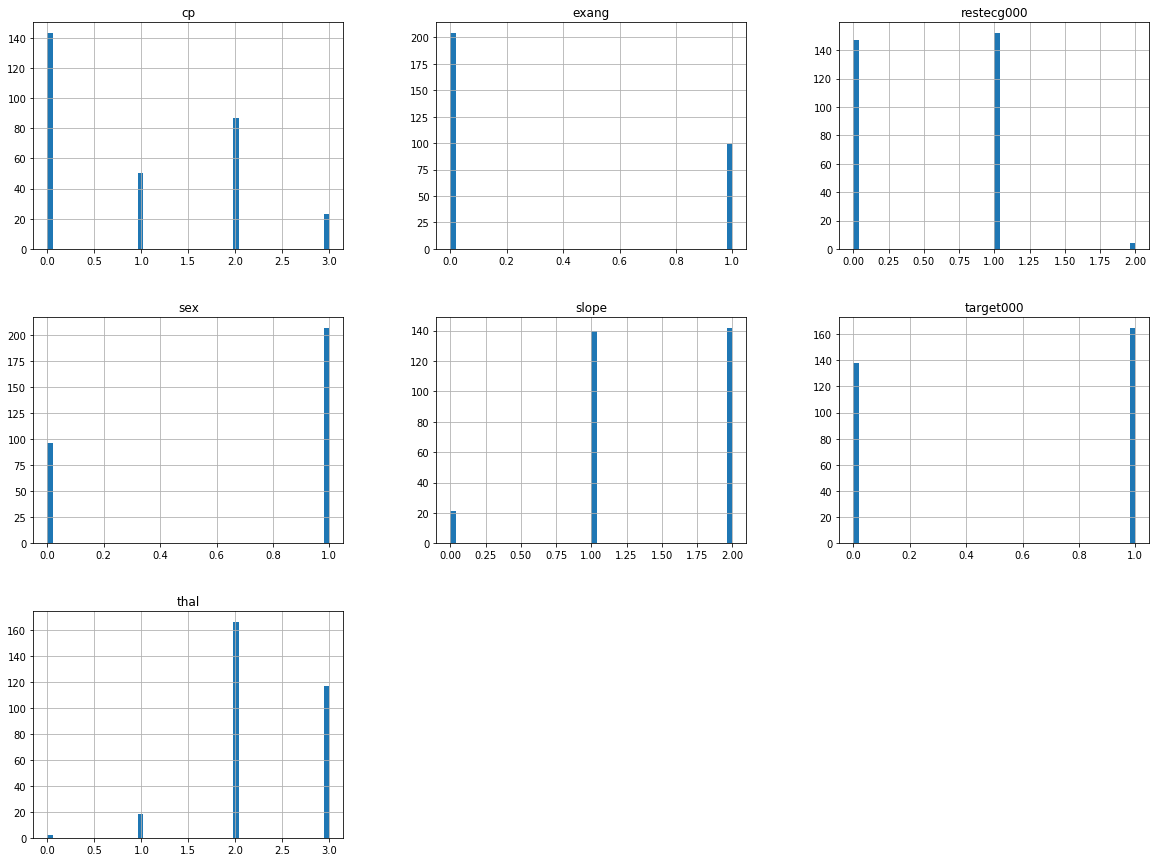

In [6]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Uczące", len(train_set), ", testowe", len(test_set))

Uczące 242 , testowe 61


In [8]:
train_labels = train_set.target000
train_set.drop("target000", axis=1, inplace=True)
test_labels = test_set.target000
test_set.drop("target000", axis=1, inplace=True)

/home/adsum/.local/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
X = train_set
Y = train_labels
test_data = test_set

In [10]:

dtc_tree_acc = 0
rfc_acc = 0
l_acc = 0
s_acc = 0
kNB_acc = 0

for i in range(100):
    
    # Drzewa decyzyjne

    dtc_clf = tree.DecisionTreeClassifier()
    dtc_clf = dtc_clf.fit(X,Y)
    dtc_prediction = dtc_clf.predict(test_data)
    #print(dtc_prediction)

    # Decyzyjny las losowy

    rfc_clf = RandomForestClassifier(n_estimators = 100)
    rfc_clf.fit(X,Y)
    rfc_prediction = rfc_clf.predict(test_data)
    #print(rfc_prediction)
    
    # Regresja logistyczna

    l_clf = LogisticRegression(solver = 'lbfgs')
    l_clf.fit(X,Y)
    l_prediction = l_clf.predict(test_data)
    #print(l_prediction)

    # SVC

    s_clf = SVC(gamma = 'scale')
    s_clf.fit(X,Y)
    s_prediction = s_clf.predict(test_data)
    #print(s_prediction)

    # k- najblizszych sasiadow

    kNB_clf = KNeighborsClassifier()
    kNB_clf.fit(X,Y)
    kNB_prediction = kNB_clf.predict(test_data)
    #print(kNB_prediction)

    # Dokładnosc

    dtc_tree_acc += accuracy_score(dtc_prediction,test_labels)
    rfc_acc += accuracy_score(rfc_prediction,test_labels)
    l_acc += accuracy_score(l_prediction,test_labels)
    s_acc += accuracy_score(s_prediction,test_labels)
    kNB_acc += accuracy_score(kNB_prediction,test_labels)

print('Drzewo decyzyjne', dtc_tree_acc, 'Decyzyjny las losowy', rfc_acc, 'Regresja logistyczna', l_acc, 'SVC', s_acc,'Najbliżsi sąsiedzi', kNB_acc)

klasyfikatory = ['Drzewo decyzyjne', 'Decyzyjny las losowy', 'Regresja logistyczna' , 'SVC','Najbliżsi sąsiedzi']
dokładnosc = np.array([dtc_tree_acc, rfc_acc, l_acc, s_acc, kNB_acc])
max_acc = np.argmax(dokładnosc)
print('\n' + klasyfikatory[max_acc] + ' jest najlepszym klasyfikatorem problemu.\n')

Drzewo decyzyjne 81.96721311475413 Decyzyjny las losowy 80.65573770491805 Regresja logistyczna 86.88524590163946 SVC 90.16393442622937 Najbliżsi sąsiedzi 77.0491803278688

SVC jest najlepszym klasyfikatorem problemu.

